In [24]:
import openpyxl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
import mglearn
import os

In [106]:
import os
data = openpyxl.load_workbook(os.getcwd().replace('\\','/')+'/kor_psych.xlsx')
sheet = data['kor_psych']
username = np.array([cell.value for row in sheet['A2':'A62'] for cell in row]) #학생 이름
X = np.array([cell.value for row in sheet['B2':'AF62'] for cell in row]).reshape(61,31)

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5,0,'feature2')

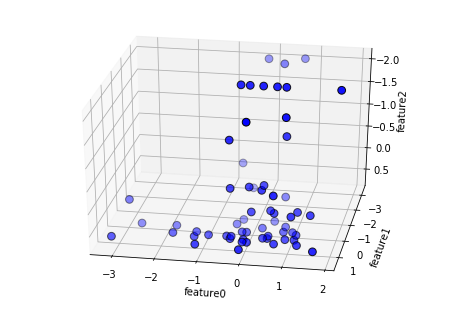

In [113]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
ax = Axes3D(figure, elev = -150, azim = -100) #3d graph

X = X_scaled
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = 'b', cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature2')

### Histogram of each feature

In [115]:
data = pd.read_csv('C:/Users/chsjk/OneDrive/Documents/MATLAB/drtoolbox/TOLz.csv')
username = np.array([data.username]) #학생 이름
pca1 = np.array([data['pc1']]).T
pca2 = np.array([data['pc2']]).T
pca3 = np.array([data['pc3']]).T
X = np.hstack((pca1,pca2,pca3))  #학생 데이터. (22,3)
y = np.array(data.target)
feature_names = np.array([['pc1','pc2','pc3']])

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5,0,'feature2')

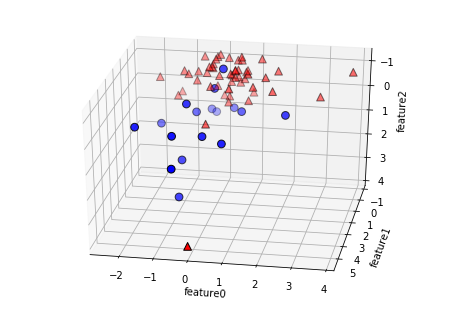

In [117]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
ax = Axes3D(figure, elev = -150, azim = -100) #3d graph

label0 = y ==0
X = X_scaled
ax.scatter(X[label0, 0], X[label0, 1], X[label0, 2], c = 'b', cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.scatter(X[~label0, 0], X[~label0, 1], X[~label0, 2],  c = 'r', marker = '^',cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature2')

### SVM

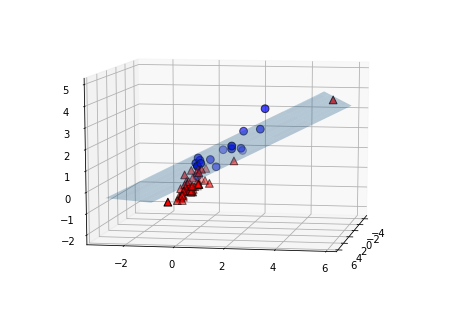

In [144]:
X_new = X
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev = 10, azim = 10)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,0].max() + 2, 50)

XX, YY =np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX,YY,ZZ,rstride = 8, cstride = 8, alpha = .3)
ax.scatter(X_new[label0, 0], X_new[label0, 1], X_new[label0, 2], c = 'b', cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.scatter(X_new[~label0, 0], X_new[~label0, 1], X_new[~label0, 2], c = 'r', marker = '^',cmap = mglearn.cm2, s =60, edgecolor = 'k')